In [1]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns

from amftrack.util.dbx import upload_folders, load_dbx, download
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer_to_archive
)
from amftrack.util.dbx import (
    read_saved_dropbox_state,
    get_dropbox_folders_prince,
    get_dropbox_folders_prince,
    save_dropbox_state,
    get_dropbox_folders_general_recursive,
)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import imageio
path = r'/scratch-shared/amftrack/stitch_temp/20230723_2342_Plate20/Img3/Img_r06_c14.tif'
im = imageio.imread(path)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  This is separate from the ipykernel package so we can avoid doing imports until


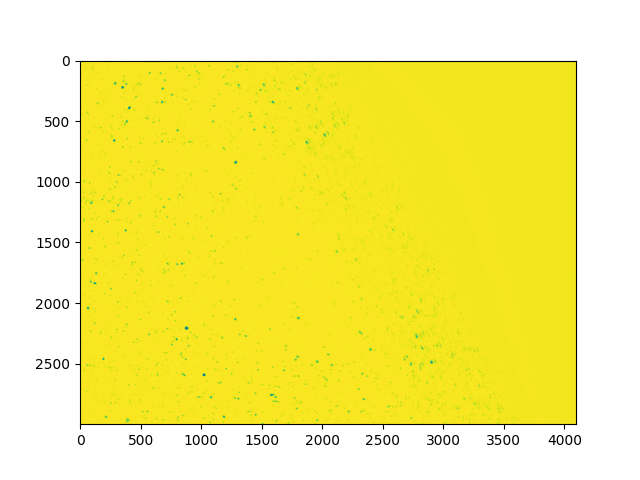

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.imshow(im)

In [2]:
dir_drop = "DATA/PRINCE"
all_folders_drop = get_dropbox_folders_prince("/DATA/PRINCE")

2023-11-10 13:54:04,285-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:04,691-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-10 13:54:06,245-[INFO]- dropbox:474 -> Request to files/list_folder/continue


sizes:   0%|          | 0/711 [00:00<?, ?it/s]

2023-11-10 13:54:06,900-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:07,055-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-10 13:54:07,473-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:07,687-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-10 13:54:08,185-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:08,340-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-10 13:54:08,846-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:09,005-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-10 13:54:09,349-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:09,529-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-10 13:54:09,862-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:10,016-[INFO]- dropbox:474 -> Request to files/list_folder
2023-11-10 13:54:10,424-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-10 13:54:10,570-[INFO]- dropbox:

In [3]:
directory_targ = os.path.join(directory_scratch, "temp") + "/"


In [4]:
plates = [
"724_20220926",
"725_20221104",
"753_20221013",
"757_20221019",
"765_20221213",
"782_20230406",
"787_202304021",
"793_20230317",
"795_20230403",
"797_20230421",
"802_20230504",
"812_20230404",
"818_20220301",
"823_20220304",
"826_20220304",
"832_20220419",
"845_20220222",
"845_20230320",
"854_20220222",
"859_20230401",
"866_20220315",
"875_20220301",
"878_20220222",
"878_20230501",
"883_20220328",
"887_2022033",
"887_20230501",
"889_20230504",
"899_20230612",
"901_20230522",
"905_20230525",
"916_20230530",
"922_202305030",
"928_20230707",
"931_20220402",
"933_20230623",
"936_20230602",
"939_20230623",
"940_20230605",
"947_20230706",
"953_20220301",
"954_20230717"

]
plates = [
'992_20220225',
'1001_20220304',
'1007_20220301',
'1016_20220509',
'1039_20220516',
'1063_20220705'
]
folders_drop = all_folders_drop.loc[all_folders_drop["unique_id"].isin(plates)]


In [22]:
folders_drop

,folder,size,change_date,tot_path_drop,Plate,CrossDate,unique_id
79152,20220719_1312_Plate13,NaN,0,data/prince/1063_20220705/20220719_1312_plate13,1063,20220705,1063_20220705
79153,20220718_2206_Plate13,NaN,0,data/prince/1063_20220705/20220718_2206_plate13,1063,20220705,1063_20220705
79154,20220718_2005_Plate13,NaN,0,data/prince/1063_20220705/20220718_2005_plate13,1063,20220705,1063_20220705
79155,20220718_1805_Plate13,NaN,0,data/prince/1063_20220705/20220718_1805_plate13,1063,20220705,1063_20220705
79156,20220718_1606_Plate13,NaN,0,data/prince/1063_20220705/20220718_1606_plate13,1063,20220705,1063_20220705
...,...,...,...,...,...,...,...
113190,20220314_2128_Plate01,NaN,0,data/prince/1007_20220301/20220314_2128_plate01,1007,20220301,1007_20220301
113191,20220314_2352_Plate01,NaN,0,data/prince/1007_20220301/20220314_2352_plate01,1007,20220301,1007_20220301
113192,20220315_1345_Plate01,NaN,0,data/prince/1007_20220301/20220315_1345_plate01,1007,20220301,1007_20220301
113193,20220315_0152_Plate01,NaN,0,data/prince/1007_20220301/20220315_0152_plate01,1007,20220301,1007_20220301


In [3]:
plates_paper = [
"3_20220426",
"12_20220502",
"16_20220419",
"480_20221205",
]
plates_paper += [
    "52_20220707",
    "56_20220701",
    "59_20201126",
    "69_20201119",
    "76_20210108",
    "81_20220704",
    "84_20220621",
    "94_20201123",
    "102_20201226",
    "152_20201224",
    "792_20210915",
    "1076_20220511",
    "941_20220404"
]
plates_paper += ['1014_20220525', 
          '1023_20220502',
          '1042_20220523',
       '1045_20220504',
          '1048_20220506',
          '1053_20220413',
       '127_20220705',
          '130_20220707',
          '30_20220509',
       '32_20220428',
          '33_20220502',
          '800_20210928'
         ]

In [4]:
select = all_folders_drop.loc[all_folders_drop["CrossDate"]<='20220101']
print(len(select))
select = select.loc[~select["unique_id"].isin(plates_paper)]
print(len(select))
plates_to_move = select['unique_id'].unique()
# plates_to_move = plates_to_move[0*len(plates_to_move)//2:1*len(plates_to_move)//2]
folders_drop = all_folders_drop.loc[all_folders_drop["unique_id"].isin(plates_to_move)]
len(folders_drop)

1089
0


0

In [6]:
plates = os.listdir('/scratch-shared/amftrack/to_tape')
folders_drop = all_folders_drop.loc[all_folders_drop["unique_id"].isin(plates)]
folders_drop

,folder,size,change_date,tot_path_drop,Plate,CrossDate,unique_id
90700,20191023_0455_Plate10,NaN,0,data/prince/13_20190902/20191023_0455_plate10,13,20190902,13_20190902
90701,20191022_2055_Plate10,NaN,0,data/prince/13_20190902/20191022_2055_plate10,13,20190902,13_20190902
90702,20191023_0055_Plate10,NaN,0,data/prince/13_20190902/20191023_0055_plate10,13,20190902,13_20190902
90703,20191023_0855_Plate10,NaN,0,data/prince/13_20190902/20191023_0855_plate10,13,20190902,13_20190902
90704,20191022_1655_Plate10,NaN,0,data/prince/13_20190902/20191022_1655_plate10,13,20190902,13_20190902
...,...,...,...,...,...,...,...
96569,20200827_0956_Plate29,NaN,0,data/prince/373_20200825/20200827_0956_plate29,373,20200825,373_20200825
96570,20200827_0556_Plate29,NaN,0,data/prince/373_20200825/20200827_0556_plate29,373,20200825,373_20200825
96571,20200827_0155_Plate29,NaN,0,data/prince/373_20200825/20200827_0155_plate29,373,20200825,373_20200825
96572,20200826_1755_Plate29,NaN,0,data/prince/373_20200825/20200826_1755_plate29,373,20200825,373_20200825


In [5]:
folders = folders_drop

directory_targ = os.path.join(directory_scratch, "to_tape") + "/"
directory = directory_targ
run_parallel_transfer(
    "from_drop_unflatten.py",
    [directory_targ],
    folders,
    20,
    "2:00:00",
    "staging",
    cpus=1,
    node="staging",
    name_job="archiving.sh",
)
# run_parallel_transfer_to_archive(
#     folders, directory, "10:00", "staging", dependency="archiving.sh"
# )

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403006


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403007


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403008


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403009


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403010


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403011


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403012


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403013


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403014


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403015


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403016


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403018


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403019


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403020


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403021


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403022


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403023


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403024


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403025


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403027
Submitted batch job 4403028


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403029


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403030


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403032


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403033


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403034


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403035


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403036


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403037


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403038


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403039


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403040


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403041


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403042


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403044


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403045


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403047


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403048


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403049


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403051


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403052


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403053


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403054


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403056


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403057


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403058


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403059


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403060


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403062


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403063


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403064


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403066


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403098


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403099


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403136


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403175


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403176


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403177


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403201


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403202


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403204


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403205


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403217


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403218


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403219


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403220


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403221


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403222


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403223


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403233


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403234


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403235


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403236


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403237


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403238


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403239


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403240


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403241


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403242


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403243


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403244


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403245


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403246


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403247


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403248


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403249


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403250


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403251


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403252


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403253


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403254


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403256


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403257


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403258


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403259


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403260


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403261


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403262


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403263


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403264


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403265


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403266


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403267


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403268


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403269


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403270


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403271


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403272


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403274


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403275


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403276


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403277


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403278


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403279


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403287


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403288


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403289


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403290


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403291


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403292


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403294


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403331


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403332


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403333
Submitted batch job 4403334


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403335


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403359


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403360


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403361


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403436


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403437


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403447


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403448


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403449


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403450


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403451


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403452
Submitted batch job 4403453


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403457


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403458


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403459


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403460


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403461


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403462


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403479


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403480


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403605


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403606


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403607


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403609


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403610


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403612


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403613


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403615


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403616


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403617


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403619


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403620


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403621


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403622
Submitted batch job 4403628


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403629


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403630


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403631


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403633


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403634


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403635


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403637


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403639


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403640


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403641


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403642


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403643


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403644


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403645


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403646


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403647


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403648


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403649


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403650


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403651


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403652


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403653


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403654


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403655


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403657


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403658


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403659


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403663


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403664


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403665


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403666


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403667


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403669


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403670


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403671


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403672


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403673


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403674


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403675


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403676


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403677


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403684


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403685


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403686


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403688


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403689


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403690


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403691


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403698


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403699


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403700


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403708


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403709


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403711


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403712


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403713


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403731


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403732


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403733


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403783


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403784


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403785


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403786


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403787


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403788


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4403789


In [6]:
plates_to_move

array(['138_20201207', '162_20201207', '384_20201013', '403_20201013',
       '400_20201013', '86_20210122', '153_20210113', '42_20201204',
       '787_20210922', '0_0', '137_20201217', '15_20210928',
       '22_20210107', '10_20210107', '748_20210917', '741_20210915',
       '35_20211007', '734_20210831', '785_20210928', '11_20211012',
       '44_20210928', '88_20210915', '737_20210901', '756_20210907',
       '55_20210113', '130_20210106', '758_20211007', '26_20210104',
       '822_20220101', '810_20211013', '809_20211012', '803_20211012',
       '799_20211001', '808_20210928', '804_20210917', '790_20210907'],
      dtype=object)

In [10]:
folders_drop['unique_id'].unique()

array(['13_20190902', '70_20200108', '79_20191221', '67_20191127',
       '77_20191122', '65_20191107', '86_20191103', '69_20191103',
       '68_20191101', '87_20191023', '189_20200317', '146_20200303',
       '143_20200209', '142_20200210', '150_20200207', '97_20200119',
       '89_20191201', '92_20191206', '93_20191127', '419_20201001',
       '416_20201008', '432_20200929', '424_20201008', '434_20200929',
       '382_20201008', '435_20201001', '425_20201001', '409_20201001',
       '405_20201001', '436_20200929', '420_20200928', '433_20200928',
       '423_20200929', '351_20200825', '373_20200825'], dtype=object)

In [7]:
directory_targ = os.path.join(directory_scratch, "to_tape") + "/"
plates = list(folders_drop['unique_id'].unique())
folders = folders_drop

run_parallel_transfer_to_archive(
    folders, directory_targ, "6:00:00", "staging",dependency=None,plates=plates
)

sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404566
Submitted batch job 4404567


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404568


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404569
Submitted batch job 4404570


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404571
Submitted batch job 4404572


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404573
Submitted batch job 4404574


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404575
Submitted batch job 4404576


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404577
Submitted batch job 4404578


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404579
Submitted batch job 4404580


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404581
Submitted batch job 4404582


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404583
Submitted batch job 4404584


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404585
Submitted batch job 4404586


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shar

Submitted batch job 4404587
Submitted batch job 4404588


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404589
Submitted batch job 4404590


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404591
Submitted batch job 4404592


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404593
Submitted batch job 4404594


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404595
Submitted batch job 4404596


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404597
Submitted batch job 4404598


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.
sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


Submitted batch job 4404599
Submitted batch job 4404600
Submitted batch job 4404601


sbatch: Single-node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: A full node consists of 32 CPU cores, 229376 MiB of memory and 0 GPUs and can be shared by up to 32 jobs.
sbatch: By default shared jobs get 7168 MiB of memory per CPU core, unless explicitly overridden with --mem-per-cpu, --mem-per-gpu or --mem.
sbatch: You will be charged for 1 CPUs, based on the number of CPUs and the amount memory that you've requested.


In [9]:
plates_to_move = plates


In [8]:
dbx = load_dbx()

for plate in plates_to_move:
    try:
        dbx.files_delete_v2(f'/data/prince/{plate}')
    except:
        pass

2023-11-09 12:56:13,123-[INFO]- dropbox:390 -> Refreshing access token.
2023-11-09 12:56:13,315-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:16,213-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:19,242-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:22,524-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:25,351-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:28,063-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:28,863-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:29,494-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:32,103-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:34,673-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:37,617-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:40,201-[INFO]- dropbox:474 -> Request to files/delete_v2
2023-11-09 12:56:41,835-[INFO]- dropbox: